One of the problem sets from CSS bootcamp tasked us with analyzing data from the QOG to compare international trade and pollution. 

I will begin by loading the packages needed to perform data analysis and to create graphs.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
from plotly import express as px
from plotly.subplots import make_subplots

/opt/conda/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


First I am loading the whole QOG basic dataset so that I can look through the variables and decide which ones will be included in my analysis.

In [2]:
poli = pd.read_csv('https://www.qogdata.pol.gu.se/data/qog_bas_ts_jan24.csv')
poli.head()

ccode        cname  year  ccode_qog    cname_qog ccodealp  ccodecow  \
0      4  Afghanistan  1946          4  Afghanistan      AFG     700.0   
1      4  Afghanistan  1947          4  Afghanistan      AFG     700.0   
2      4  Afghanistan  1948          4  Afghanistan      AFG     700.0   
3      4  Afghanistan  1949          4  Afghanistan      AFG     700.0   
4      4  Afghanistan  1950          4  Afghanistan      AFG     700.0   

         version        cname_year ccodealp_year  ...  wdi_trade  \
0  QoGBasTSjan24  Afghanistan 1946         AFG46  ...        NaN   
1  QoGBasTSjan24  Afghanistan 1947         AFG47  ...        NaN   
2  QoGBasTSjan24  Afghanistan 1948         AFG48  ...        NaN   
3  QoGBasTSjan24  Afghanistan 1949         AFG49  ...        NaN   
4  QoGBasTSjan24  Afghanistan 1950         AFG50  ...        NaN   

   wdi_unempfilo  wdi_unempilo  wdi_unempmilo  wdi_unempyfilo  wdi_unempyilo  \
0            NaN           NaN            NaN             NaN            NaN   
1            NaN           NaN            NaN             NaN            NaN   
2            NaN           NaN            NaN             NaN            NaN   
3            NaN           NaN            NaN             NaN            NaN   
4            NaN           NaN            NaN             NaN            NaN   

   wdi_unempymilo  wdi_wip  who_sanittot  whr_hap  
0             NaN      NaN           NaN      NaN  
1             NaN      NaN           NaN      NaN  
2             NaN      NaN           NaN      NaN  
3             NaN      NaN           NaN      NaN  
4             NaN      NaN           NaN      NaN  

[5 rows x 252 columns]

Now I am selecting the important variables, and filtering it to only show the last 50 years.

In [3]:
#picking the data points that seem important and filtering only the last 50 years
poli2 = poli[['cname', 'year', 'dr_eg', 'fi_ftradeint', 'gle_trade', 'dr_eg', 'gle_exp', 'gle_imp', 'wdi_trade']]

recent_years = 50
current_year = 2024


poli2 = poli[poli['year'] >= (current_year - recent_years)][['cname', 'year', 'gle_pop', 'gle_exp', 'gle_imp', 'gle_trade', 'dr_eg', 'fi_ftradeint', 'wdi_trade']]


poli2.head()

cname  year  gle_pop    gle_exp    gle_imp  gle_trade      dr_eg  \
28  Afghanistan  1974  15070.0  295.98001  235.75999  531.72998  27.462164   
29  Afghanistan  1975  15378.0  342.07999  235.80000  577.87000  28.180368   
30  Afghanistan  1976  15653.0  447.60001  310.82001  758.41998  24.830343   
31  Afghanistan  1977  15892.0  604.34003  327.23001  931.57001  28.050037   
32  Afghanistan  1978  16064.0  646.70001  310.29001  956.97998  21.005278   

    fi_ftradeint  wdi_trade  
28           NaN  28.865980  
29           NaN  26.948358  
30           NaN  28.086957  
31           NaN  26.486080  
32           NaN  24.713804

First I am loading the whole QOG environmental indicators dataset so that I can look through the variables and decide which ones will be included in my analysis.

In [4]:
envi = pd.read_csv('https://www.qogdata.pol.gu.se/data/qog_ei_ts_sept21.csv')
envi.head()

Unnamed: 0        cname  ccode  year    cname_qog  ccode_qog ccodealp  \
0           1  Afghanistan    4.0  1946  Afghanistan          4      AFG   
1           2  Afghanistan    4.0  1947  Afghanistan          4      AFG   
2           3  Afghanistan    4.0  1948  Afghanistan          4      AFG   
3           4  Afghanistan    4.0  1949  Afghanistan          4      AFG   
4           5  Afghanistan    4.0  1950  Afghanistan          4      AFG   

  ccodealp_year  ccodecow  ccodevdem  ... wdi_precip wdi_tpa  wvs_ameop  \
0         AFG46     700.0       36.0  ...        NaN     NaN        NaN   
1         AFG47     700.0       36.0  ...        NaN     NaN        NaN   
2         AFG48     700.0       36.0  ...        NaN     NaN        NaN   
3         AFG49     700.0       36.0  ...        NaN     NaN        NaN   
4         AFG50     700.0       36.0  ...        NaN     NaN        NaN   

   wvs_ceom  wvs_deop  wvs_epmip  wvs_epmpp  wvs_imeop  wvs_pedp  wvs_ploem  
0       NaN       NaN        NaN        NaN        NaN       NaN        NaN  
1       NaN       NaN        NaN        NaN        NaN       NaN        NaN  
2       NaN       NaN        NaN        NaN        NaN       NaN        NaN  
3       NaN       NaN        NaN        NaN        NaN       NaN        NaN  
4       NaN       NaN        NaN        NaN        NaN       NaN        NaN  

[5 rows x 415 columns]

Now I am selecting the important variables, and filtering it to only show the last 50 years.

In [5]:
#picking the data points that seem important and filtering only the last 50 years
envi2 = envi[['cname', 'year','ccl_nmitlp', 'ccl_leglp', 'edgar_co2t', 'ccci_em', 'epi_epi']]

envi.head()

Unnamed: 0        cname  ccode  year    cname_qog  ccode_qog ccodealp  \
0           1  Afghanistan    4.0  1946  Afghanistan          4      AFG   
1           2  Afghanistan    4.0  1947  Afghanistan          4      AFG   
2           3  Afghanistan    4.0  1948  Afghanistan          4      AFG   
3           4  Afghanistan    4.0  1949  Afghanistan          4      AFG   
4           5  Afghanistan    4.0  1950  Afghanistan          4      AFG   

  ccodealp_year  ccodecow  ccodevdem  ... wdi_precip wdi_tpa  wvs_ameop  \
0         AFG46     700.0       36.0  ...        NaN     NaN        NaN   
1         AFG47     700.0       36.0  ...        NaN     NaN        NaN   
2         AFG48     700.0       36.0  ...        NaN     NaN        NaN   
3         AFG49     700.0       36.0  ...        NaN     NaN        NaN   
4         AFG50     700.0       36.0  ...        NaN     NaN        NaN   

   wvs_ceom  wvs_deop  wvs_epmip  wvs_epmpp  wvs_imeop  wvs_pedp  wvs_ploem  
0       NaN       NaN        NaN        NaN        NaN       NaN        NaN  
1       NaN       NaN        NaN        NaN        NaN       NaN        NaN  
2       NaN       NaN        NaN        NaN        NaN       NaN        NaN  
3       NaN       NaN        NaN        NaN        NaN       NaN        NaN  
4       NaN       NaN        NaN        NaN        NaN       NaN        NaN  

[5 rows x 415 columns]

Now I am merging the datasets and dropping empty rows and columns

In [6]:
#merging and getting rid of extra empty values!!
merged_data = pd.merge(poli2, envi2, how='inner', on=['cname', 'year'])

# Drop columns with all NaN values
merged_data = merged_data.dropna(axis=1, how='all')

# Drop rows with all NaN values
merged_data = merged_data.dropna(axis=0, how='all')


merged_data.head()

cname  year  gle_pop    gle_exp    gle_imp  gle_trade      dr_eg  \
0  Afghanistan  1974  15070.0  295.98001  235.75999  531.72998  27.462164   
1  Afghanistan  1975  15378.0  342.07999  235.80000  577.87000  28.180368   
2  Afghanistan  1976  15653.0  447.60001  310.82001  758.41998  24.830343   
3  Afghanistan  1977  15892.0  604.34003  327.23001  931.57001  28.050037   
4  Afghanistan  1978  16064.0  646.70001  310.29001  956.97998  21.005278   

   fi_ftradeint  wdi_trade  ccl_nmitlp  ccl_leglp  edgar_co2t  ccci_em  \
0           NaN  28.865980         NaN        NaN    1.913149      NaN   
1           NaN  26.948358         NaN        NaN    1.713586      NaN   
2           NaN  28.086957         NaN        NaN    1.630803      NaN   
3           NaN  26.486080         NaN        NaN    1.894227      NaN   
4           NaN  24.713804         NaN        NaN    1.639085      NaN   

   epi_epi  
0      NaN  
1      NaN  
2      NaN  
3      NaN  
4      NaN

Now I am saving the dataset as a CSV file

In [15]:
merged_data.to_csv('pollution_trade_dataset.csv', index=False)

Now we can start plotting graphs!

My first graph compares world trade and climate laws. We can see that as world trade increases so do climate laws

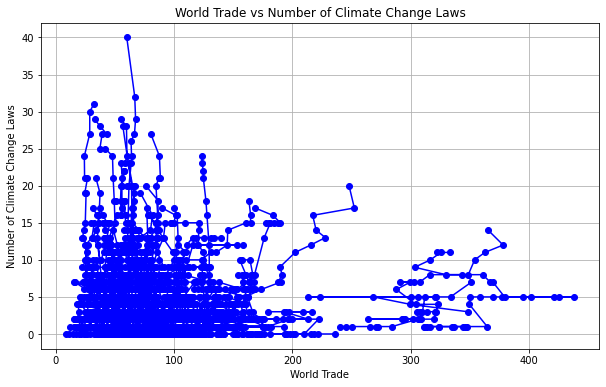

In [7]:
#plot 1 - world trade and climate laws
plt.figure(figsize=(10, 6))
plt.plot(merged_data['wdi_trade'], merged_data['ccl_nmitlp'], marker='o', linestyle='-', color='b')

plt.xlabel('World Trade')
plt.ylabel('Number of Climate Change Laws')
plt.title('World Trade vs Number of Climate Change Laws')

plt.grid(True)

plt.show()

My second graph shows global trade openness and total CO2 emissions. Less global trade openness is correlated with less C)2 emissions.

In [11]:
fig = px.scatter(
    data_frame=merged_data,
    x="edgar_co2t", 
    y="gle_trade",
    title="Global trade openness and total co2 emissions",
    color = 'cname',
    template='simple_white',
    hover_data=['cname']  # This will show 'cname' on hover
)


fig.show()

My third plot is total trade and total CO2 emissions. As trade increases so do CO2 emissions

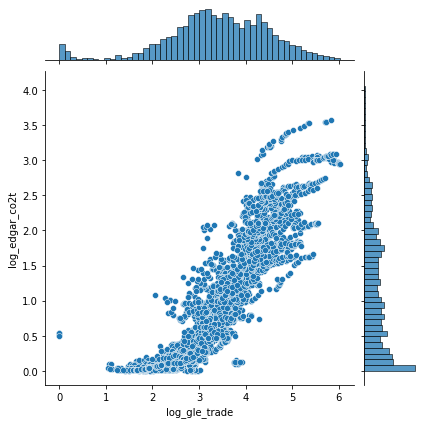

In [12]:
#plot 3 - and total co2 emissions and total trade 
merged_data['log_gle_trade'] = np.log10(merged_data['gle_trade'] + 1)
merged_data['log_edgar_co2t'] = np.log10(merged_data['edgar_co2t'] + 1)

# Create the joint plot
sns.jointplot(
    x='log_gle_trade',
    y='log_edgar_co2t',
    data=merged_data,
    kind='scatter',
    marginal_kws=dict(bins=50, fill=True)
)

plt.show()

my fourth plot is total exports and total co2 emissions. As total exports increase so do CO2 emissions.

In [13]:
#plot 4 - total exports and co2 emissions
fig = px.scatter(
    data_frame=merged_data.assign(
        log_gle_exp=np.log10(merged_data['gle_exp'] + 1),  # Apply log transformation
        log_edgar_co2t=np.log10(merged_data['edgar_co2t'] + 1)  # Apply log transformation
    ),
    x="log_gle_exp",  
    y="log_edgar_co2t",  
    title="Log-transformed Exports vs CO2 Emissions",
    hover_data=['cname'],  
    marginal_x='histogram',  
    marginal_y='histogram',  
    template='simple_white',  
    trendline='ols',
    color='epi_epi'
)


fig.show()

My fifth plot is total imports and total CO2 emissions. As total imports increase so do CO2 emissions.

In [14]:
#plot 5 - total imports and co2 emissions 
fig = px.scatter(
    data_frame=merged_data.assign(
        log_gle_imp=np.log10(merged_data['gle_imp'] + 1),  
        log_edgar_co2t=np.log10(merged_data['edgar_co2t'] + 1)  
    ),
    x="log_gle_imp",             
    y="log_edgar_co2t",          
    title="Log-transformed Imports vs CO2 Emissions",
    hover_data=['cname'],        
    marginal_x='histogram',      
    marginal_y='histogram',      
    template='simple_white',     
    trendline='ols',             
    color='epi_epi'              
)


fig.show()

As we can see, it seems that as trade increases so do CO2 emissions overall. While CO2 emissions are a good marker of pollution, they are not a complete picture. It also seems that higher levels of trading lead to more climate laws. To fully understand this relationship it would be helpful to explore different measures of pollution.